In [4]:
#Importing important Libraries which will be used for Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
plt.style.use('ggplot')

In [5]:
train_data=pd.read_csv('.../Loan Prediction/Data/cleaned_train.csv')
test_data=pd.read_csv('.../Data/cleaned_test.csv')

In [6]:
train_data.drop('Unnamed: 0',axis=1,inplace=True)
test_data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,4128.978102,1359.425036,131.173802,342.569343,0.773723
std,1907.396960,1458.228533,51.648601,64.677492,0.418803
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2768.750000,0.000000,100.000000,360.000000,1.000000
50%,3656.000000,1293.500000,125.000000,360.000000,1.000000
75%,5000.000000,2250.000000,155.000000,360.000000,1.000000
max,10139.000000,5701.000000,376.000000,480.000000,1.000000


In [8]:
train_data.shape

(548, 13)

# Feature Engineering

In [9]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


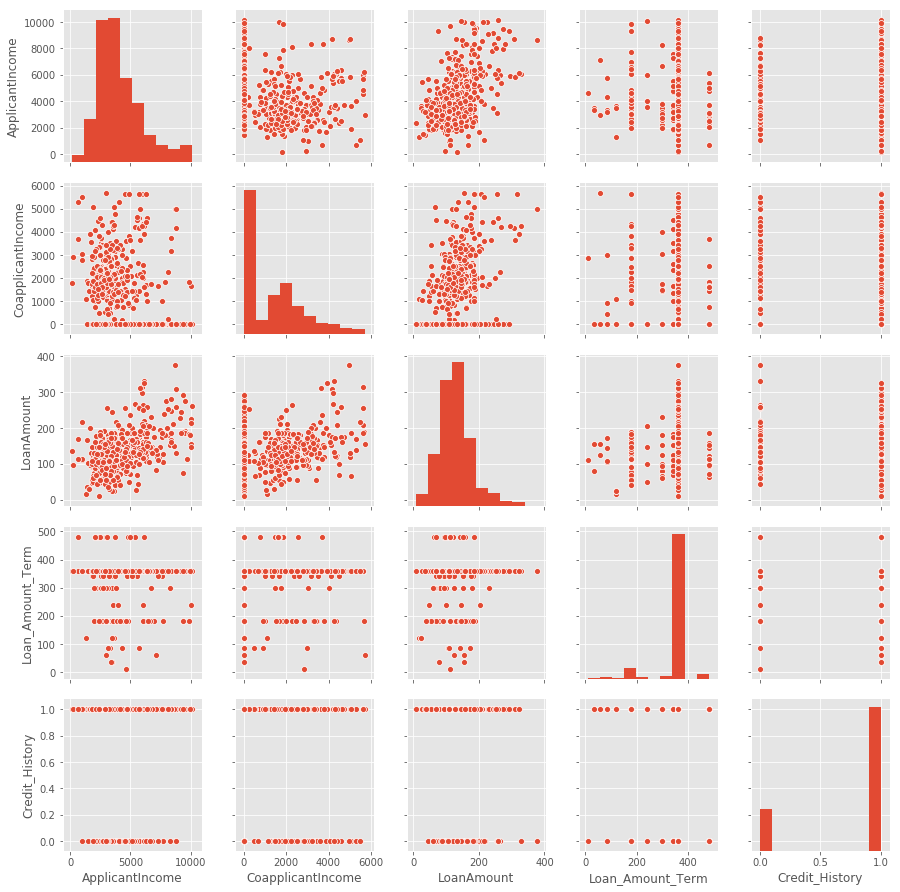

In [10]:
sns.pairplot(train_data)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 13 columns):
Loan_ID              548 non-null object
Gender               548 non-null object
Married              548 non-null object
Dependents           548 non-null object
Education            548 non-null object
Self_Employed        548 non-null object
ApplicantIncome      548 non-null int64
CoapplicantIncome    548 non-null float64
LoanAmount           548 non-null float64
Loan_Amount_Term     548 non-null float64
Credit_History       548 non-null float64
Property_Area        548 non-null object
Loan_Status          548 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 55.7+ KB


In [12]:
train_data['Total_Income']=train_data.ApplicantIncome + train_data.CoapplicantIncome
test_data['Total_Income']=test_data.ApplicantIncome + test_data.CoapplicantIncome

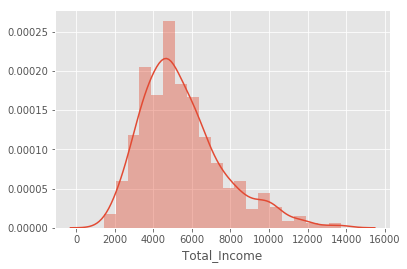

In [13]:
sns.distplot(train_data.Total_Income)

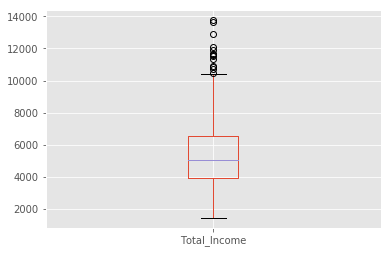

In [14]:
#Creating a variable Total Income to normalize the dataset
train_data['Total_Income'].plot(kind='box')

In [15]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [16]:
l_income,u_income=outlier_treatment(train_data.Total_Income)
train_data.drop(train_data[ (train_data.Total_Income > u_income) | (train_data.Total_Income < l_income) ].index , inplace=True)
l_income_test,u_income_test=outlier_treatment(test_data.Total_Income)
test_data.drop(test_data[ (test_data.Total_Income > u_income_test) | (test_data.Total_Income < l_income_test) ].index , inplace=True)

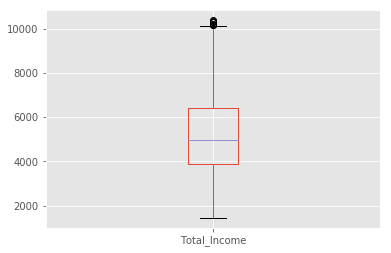

In [17]:
train_data['Total_Income'].plot.box()

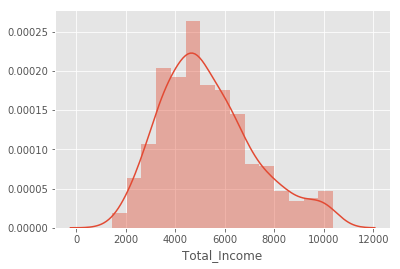

In [18]:
sns.distplot(train_data.Total_Income)

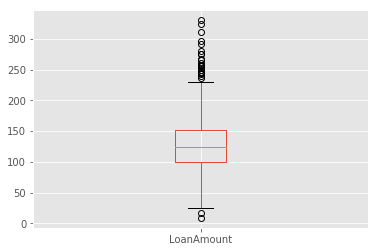

In [19]:
train_data['LoanAmount'].plot.box()

In [20]:
l_loan,u_loan=outlier_treatment(train_data.LoanAmount)
train_data.drop(train_data[ (train_data.LoanAmount > u_loan) | (train_data.LoanAmount < l_loan) ].index , inplace=True)

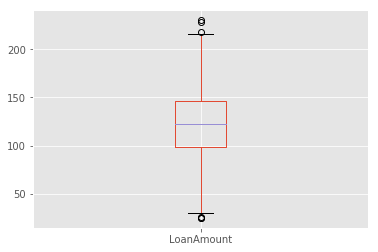

In [21]:
train_data['LoanAmount'].plot.box()

In [22]:
l_loan_test,u_loan_test=outlier_treatment(test_data.LoanAmount)
test_data.drop(test_data[ (test_data.LoanAmount > u_loan_test) | (test_data.LoanAmount < l_loan_test) ].index , inplace=True)

In [23]:
train_data.shape

(509, 14)

In [24]:
test_data.shape

(320, 13)

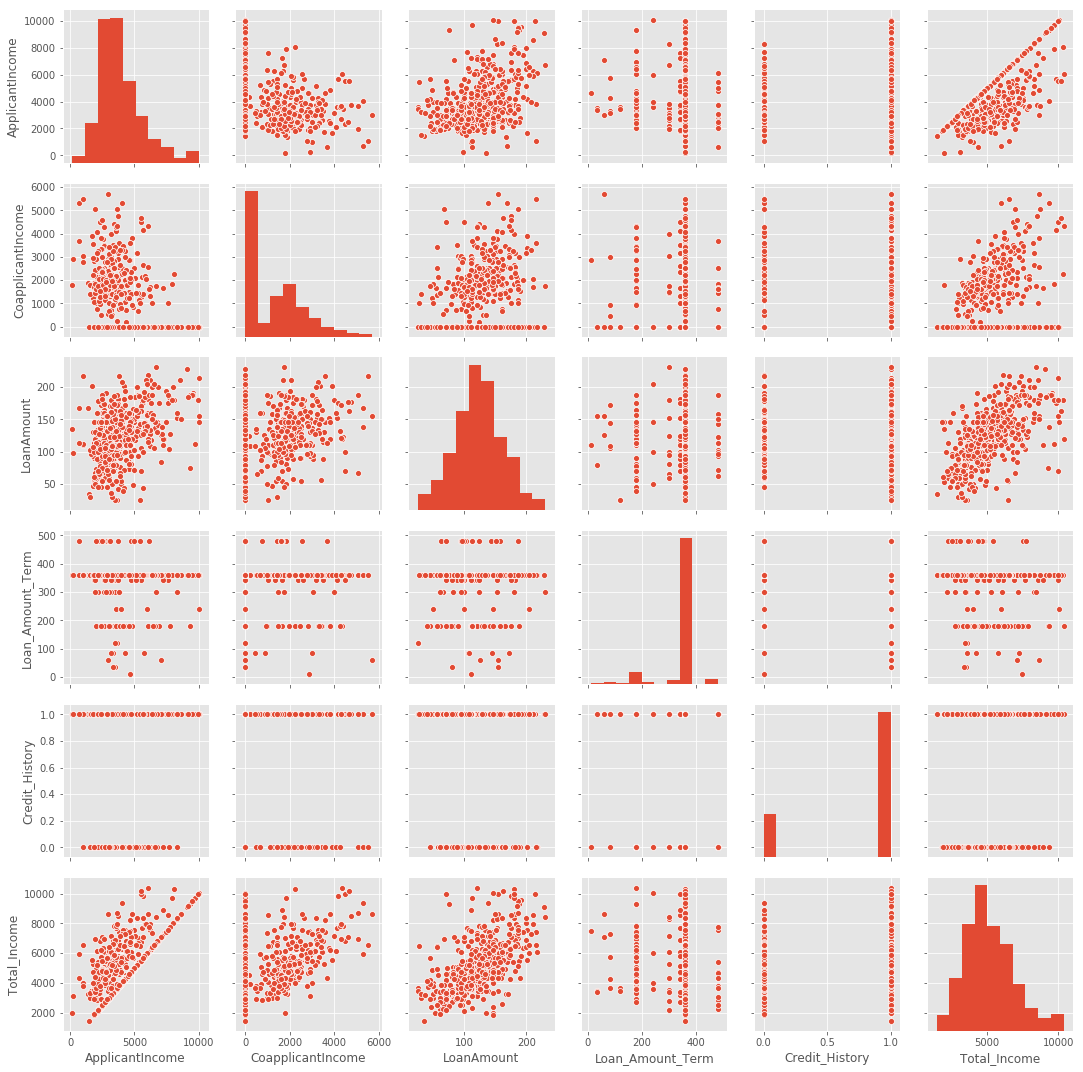

In [25]:
sns.pairplot(train_data)

In [26]:
#Making a copy of training dataset to maintain sanctity of original dataset
train_data_copy=train_data.copy()

In [27]:
# Convert Object Dataset to categorical dataset
train_data_copy['Gender']=train_data_copy['Gender'].astype('category')
train_data_copy['Married']=train_data_copy['Married'].astype('category')
train_data_copy['Dependents']=train_data_copy['Dependents'].astype('category')
train_data_copy['Education']=train_data_copy['Education'].astype('category')
train_data_copy['Self_Employed']=train_data_copy['Self_Employed'].astype('category')
train_data_copy['Property_Area']=train_data_copy['Property_Area'].astype('category')
train_data_copy['Loan_Status']=train_data_copy['Loan_Status'].astype('category')

In [28]:
# Repeat process for Test Data
test_data['Gender']=test_data['Gender'].astype('category')
test_data['Married']=test_data['Married'].astype('category')
test_data['Dependents']=test_data['Dependents'].astype('category')
test_data['Education']=test_data['Education'].astype('category')
test_data['Self_Employed']=test_data['Self_Employed'].astype('category')
test_data['Property_Area']=test_data['Property_Area'].astype('category')

In [29]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder(LabelEncoder):
    """
    Wraps sklearn LabelEncoder functionality for use on multiple columns of a
    pandas dataframe.

    """
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, dframe):
        """
        Fit label encoder to pandas columns.

        Access individual column classes via indexig `self.all_classes_`

        Access individual column encoders via indexing
        `self.all_encoders_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            for idx, column in enumerate(self.columns):
                # fit LabelEncoder to get `classes_` for the column
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values)
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                # append this column's encoder
                self.all_encoders_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                le.fit(dframe.loc[:, column].values)
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
        return self

    def fit_transform(self, dframe):
        """
        Fit label encoder and return encoded labels.

        Access individual column classes via indexing
        `self.all_classes_`
        
        Access individual column encoders via indexing
        `self.all_encoders_`

        Access individual column encoded labels via indexing
        `self.all_labels_`
        """
        # if columns are provided, iterate through and get `classes_`
        if self.columns is not None:
            # ndarray to hold LabelEncoder().classes_ for each
            # column; should match the shape of specified `columns`
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            self.all_encoders_ = np.ndarray(shape=self.columns.shape,
                                            dtype=object)
            self.all_labels_ = np.ndarray(shape=self.columns.shape,
                                          dtype=object)
            for idx, column in enumerate(self.columns):
                # instantiate LabelEncoder
                le = LabelEncoder()
                # fit and transform labels in the column
                dframe.loc[:, column] =\
                    le.fit_transform(dframe.loc[:, column].values)
                # append the `classes_` to our ndarray container
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
                self.all_labels_[idx] = le
        else:
            # no columns specified; assume all are to be encoded
            self.columns = dframe.iloc[:, :].columns
            self.all_classes_ = np.ndarray(shape=self.columns.shape,
                                           dtype=object)
            for idx, column in enumerate(self.columns):
                le = LabelEncoder()
                dframe.loc[:, column] = le.fit_transform(
                        dframe.loc[:, column].values)
                self.all_classes_[idx] = (column,
                                          np.array(le.classes_.tolist(),
                                                  dtype=object))
                self.all_encoders_[idx] = le
        return dframe.loc[:, self.columns].values

    def transform(self, dframe):
        """
        Transform labels to normalized encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[
                    idx].transform(dframe.loc[:, column].values)
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx].transform(dframe.loc[:, column].values)
        return dframe.loc[:, self.columns].values

    def inverse_transform(self, dframe):
        """
        Transform labels back to original encoding.
        """
        if self.columns is not None:
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx].inverse_transform(dframe.loc[:, column].values)
        else:
            self.columns = dframe.iloc[:, :].columns
            for idx, column in enumerate(self.columns):
                dframe.loc[:, column] = self.all_encoders_[idx].inverse_transform(dframe.loc[:, column].values)
        return dframe.loc[:, self.columns].values

In [30]:
train_data_copy_columns = train_data_copy.iloc[:, :].select_dtypes(include=['category']).columns


In [31]:
mcle = MultiColumnLabelEncoder(columns=train_data_copy_columns)

In [32]:
mcle.fit(train_data_copy)

MultiColumnLabelEncoder(columns=Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object'))

In [33]:
mcle.transform(train_data_copy)

array([[1, 0, 0, ..., 0, 2, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 2, 1],
       ...,
       [1, 1, 3, ..., 0, 0, 1],
       [1, 1, 2, ..., 0, 2, 1],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [34]:
train_data_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


In [35]:
test_data_columns = test_data.iloc[:, :].select_dtypes(include=['category']).columns
mcle = MultiColumnLabelEncoder(columns=test_data_columns)
mcle.fit(test_data)
mcle.transform(test_data)

array([[1, 1, 0, 0, 0, 2],
       [1, 1, 1, 0, 0, 2],
       [1, 1, 2, 0, 0, 2],
       ...,
       [1, 1, 0, 0, 0, 2],
       [1, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0]], dtype=int64)

In [36]:
corr=train_data_copy.corr()

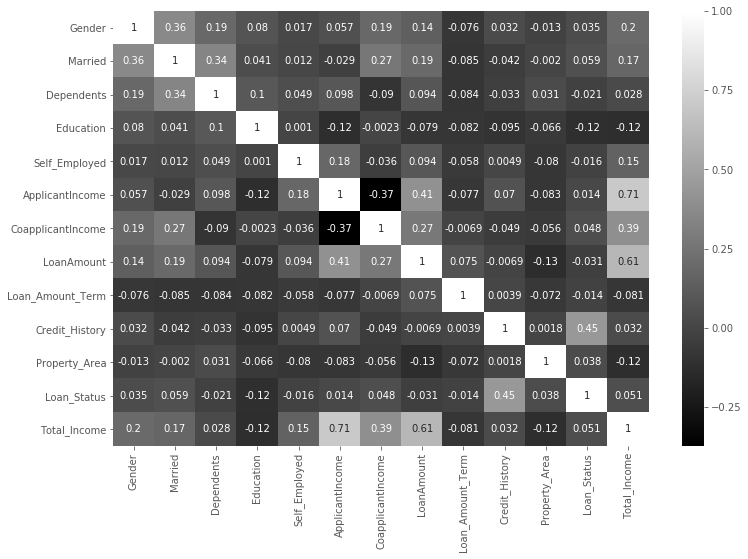

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='gist_gray',annot=True)

All variables are highly distributed and no one variable is responsible for overall result on Loan Status. Applicant Income and Total Income are highly correlated and could be considered redundant. Hence, we will not consider ApplicantIncome as considerable variable

# Machine Learning Model for predicting Loan Status

### 1. Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
X=train_data_copy.drop(['Loan_ID','Loan_Status','ApplicantIncome'],axis=1)
y=train_data_copy['Loan_Status']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)


In [40]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
y_predict=model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.796875

In [43]:
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [44]:
kf=KFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=20)
print("Cross-val score:", scores)

Cross-val score: [0.84615385 0.76923077 0.80769231 0.76923077 0.76923077 0.80769231
 0.65384615 0.76923077 0.76923077 0.80769231 0.61538462 0.80769231
 0.76923077 0.8        0.84       0.8        0.70833333 0.79166667
 0.83333333 0.83333333]


In [45]:
predictions=cross_val_predict(model,X,y,cv=6)

In [46]:
avg_score = np.mean(scores)
print("avg_score cross-validation:",avg_score)

avg_score cross-validation: 0.7784102564102564


### 2. Support Vector Machine


In [47]:
from sklearn.svm import SVC
kf = KFold(n_splits=5, random_state=None, shuffle=False)


svm=SVC()

scores = cross_val_score(svm, X, y, cv=5)
print("Cross-val score:", scores)



Cross-val score: [0.68932039 0.69607843 0.70588235 0.7029703  0.69306931]


In [48]:
avg_score_svc = np.mean(scores)
print("avg_score cross-validation:",avg_score_svc)

avg_score cross-validation: 0.6974641553247272


### 3. Gaussian Process

In [49]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
clf_gpc=GaussianProcessClassifier(kernel=kernel,random_state=0)

scores = cross_val_score(clf_gpc, X, y, cv=5)
print("Cross-val score:", scores)


Cross-val score: [0.68932039 0.69607843 0.69607843 0.69306931 0.69306931]


In [50]:
avg_score_gpc = np.mean(scores)
print("avg_score cross-validation:",avg_score_gpc)

avg_score cross-validation: 0.6935231729911996


### 4. DecisionTrees

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
scores = cross_val_score(clf_gpc, X, y, cv=5)
dtree.fit(X,y)
print("Cross-val score:", scores)

Cross-val score: [0.68932039 0.69607843 0.69607843 0.69306931 0.69306931]


In [52]:
avg_score_dtree = np.mean(scores)
print("avg_score cross-validation:",avg_score_dtree)

avg_score cross-validation: 0.6935231729911996


In [53]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dtree, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("train_graph") 

'train_graph.pdf'

### Random Forest Classifier


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
Rf_clf=RandomForestClassifier()
Rf_clf.fit(X_train,y_train)

scores = cross_val_score(Rf_clf, X, y, cv=5)
print("Cross-val score:", scores)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



Cross-val score: [0.77669903 0.7254902  0.73529412 0.67326733 0.69306931]


In [55]:
avg_score_Rf = np.mean(scores)
print("avg_score cross-validation:",avg_score_Rf)

avg_score cross-validation: 0.720763995303014


In [56]:
# feature importance
featimp = pd.Series(Rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print (featimp)

LoanAmount           0.215088
Total_Income         0.214464
Credit_History       0.188272
CoapplicantIncome    0.131835
Loan_Amount_Term     0.056230
Property_Area        0.047278
Dependents           0.044589
Gender               0.038968
Education            0.030457
Married              0.017847
Self_Employed        0.014971
dtype: float64


In [57]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Total_Income','LoanAmount','Credit_History','CoapplicantIncome','Property_Area']
scores = cross_val_score(Rf_clf, train_data_copy[predictor_var], y, cv=5)
print("Cross-val score:", scores)

Cross-val score: [0.70873786 0.75490196 0.73529412 0.69306931 0.77227723]


In [58]:
avg_score_Rf2 = np.mean(scores)
print("avg_score cross-validation:",avg_score_Rf2)

avg_score cross-validation: 0.7328560954325015


In [59]:
# Estimating different models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('SVM',SVC()))
models.append(('Gaussian',GaussianProcessClassifier(kernel=kernel,random_state=0)))
models.append(('Tree',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))

LR: 0.778004 (0.021016)
SVM: 0.697418 (0.027605)
Gaussian: 0.693496 (0.026809)
Tree: 0.720986 (0.015327)
RF: 0.717026 (0.034218)


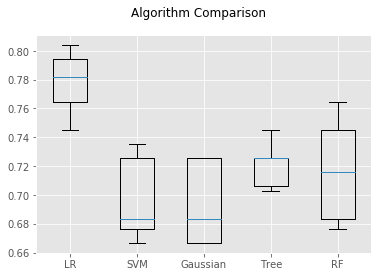

In [60]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=5)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Logistic Regression has highest accuracy score and thus we will use this model to predict Loan Status of Test dataset

In [61]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,5720
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4576
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,6800
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.0,2,4886
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,3276


In [62]:
X_test=test_data.drop(['Loan_ID','ApplicantIncome'],axis=1)

In [63]:
model=LogisticRegression()

In [64]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
y_test=model.predict(X_test)

In [66]:
test_data['Loan_Status']=y_test

In [67]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,5720,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4576,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,6800,1
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.0,2,4886,0
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,3276,1


In [68]:
mcle.inverse_transform(test_data)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in a

array([['Male', 'Yes', '0', 'Graduate', 'No', 'Urban'],
       ['Male', 'Yes', '1', 'Graduate', 'No', 'Urban'],
       ['Male', 'Yes', '2', 'Graduate', 'No', 'Urban'],
       ...,
       ['Male', 'Yes', '0', 'Graduate', 'No', 'Urban'],
       ['Male', 'No', '0', 'Graduate', 'No', 'Semiurban'],
       ['Male', 'Yes', '0', 'Graduate', 'No', 'Rural']], dtype=object)

In [69]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban,4886,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,1


In [70]:
test_data['Loan_Status']=test_data['Loan_Status'].replace([0,1],['No','Yes'])

In [71]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,Yes
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,Yes
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,Yes
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban,4886,No
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,Yes
